In [1]:
#!pip install apyori
#!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
path="MicroDados2018MG.csv"

In [4]:
dadosEnem = pd.read_csv(path,sep=';',encoding='latin1',low_memory=False)

dadosEnem.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180008895637,3119401,31,18.0,F,0.0,3,1,3119401.0,Coronel Fabriciano,...,A,B,B,A,C,A,A,B,B,A
1,180008309642,3154606,31,17.0,F,0.0,0,1,3106200.0,Belo Horizonte,...,A,B,A,B,B,A,B,B,B,A
2,180007290041,3153905,31,17.0,F,0.0,3,1,3153905.0,Raposos,...,A,B,A,A,C,A,A,B,B,A
3,180008199527,3170206,31,17.0,F,0.0,1,1,3170206.0,Uberlândia,...,B,B,A,A,C,B,B,B,B,A
4,180008205421,3103504,31,17.0,F,0.0,1,1,3502705.0,Apiaí,...,A,B,B,A,D,A,A,A,B,A


In [5]:
dadosEnem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137963 entries, 0 to 137962
Data columns (total 73 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   NU_INSCRICAO             137963 non-null  int64  
 1   CO_MUNICIPIO_RESIDENCIA  137963 non-null  int64  
 2   CO_UF_RESIDENCIA         137963 non-null  int64  
 3   NU_IDADE                 137958 non-null  float64
 4   TP_SEXO                  137963 non-null  object 
 5   TP_ESTADO_CIVIL          135212 non-null  float64
 6   TP_COR_RACA              137963 non-null  int64  
 7   TP_NACIONALIDADE         137963 non-null  int64  
 8   CO_MUNICIPIO_NASCIMENTO  131845 non-null  float64
 9   NO_MUNICIPIO_NASCIMENTO  131845 non-null  object 
 10  CO_UF_NASCIMENTO         131845 non-null  float64
 11  SG_UF_NASCIMENTO         131845 non-null  object 
 12  TP_ST_CONCLUSAO          137963 non-null  int64  
 13  TP_ANO_CONCLUIU          137963 non-null  int64  
 14  TP_E

#Colunas a serem retiradas
* SG_UF_NASCIMENTO (valor duplicado)
* TP_Nacionalidade
* TP_Estado_Civil
* SG_UF_ESC
* SG_UF_PROVA
* CO_MUNICIPIO_PROVA (nesta base, as outras referências aos municipios foram feitas por nome)

O que mais foi feito:
* Retirada dos valores nan e várias colunas
* Tratamento de dados
* Tentativa de rodar o apriori


In [6]:
dadosEnem = dadosEnem.drop(['SG_UF_NASCIMENTO' ], axis=1)
dadosEnem = dadosEnem.drop(['TP_NACIONALIDADE' ], axis=1)
dadosEnem = dadosEnem.drop(['TP_ESTADO_CIVIL' ], axis=1)
#dadosEnem = dadosEnem.drop(['SG_UF_ESC'], axis=1)
dadosEnem = dadosEnem.drop(['SG_UF_ESC_x'], axis=1)
dadosEnem = dadosEnem.drop(['SG_UF_ESC_y'], axis=1)
dadosEnem = dadosEnem.drop(['SG_UF_PROVA'], axis=1)
dadosEnem = dadosEnem.drop(['CO_MUNICIPIO_PROVA'], axis=1)
dadosEnem = dadosEnem.drop(['TP_PRESENCA_CN'], axis=1)
dadosEnem = dadosEnem.drop(['TP_PRESENCA_CH'], axis=1)
dadosEnem = dadosEnem.drop(['TP_PRESENCA_LC'], axis=1)
dadosEnem = dadosEnem.drop(['TP_PRESENCA_MT'], axis=1)














In [7]:
dadosEnem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137963 entries, 0 to 137962
Data columns (total 62 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   NU_INSCRICAO             137963 non-null  int64  
 1   CO_MUNICIPIO_RESIDENCIA  137963 non-null  int64  
 2   CO_UF_RESIDENCIA         137963 non-null  int64  
 3   NU_IDADE                 137958 non-null  float64
 4   TP_SEXO                  137963 non-null  object 
 5   TP_COR_RACA              137963 non-null  int64  
 6   CO_MUNICIPIO_NASCIMENTO  131845 non-null  float64
 7   NO_MUNICIPIO_NASCIMENTO  131845 non-null  object 
 8   CO_UF_NASCIMENTO         131845 non-null  float64
 9   TP_ST_CONCLUSAO          137963 non-null  int64  
 10  TP_ANO_CONCLUIU          137963 non-null  int64  
 11  TP_ESCOLA                137963 non-null  int64  
 12  TP_ENSINO                137932 non-null  float64
 13  IN_TREINEIRO             137963 non-null  int64  
 14  CO_E

## É necessário mudar o tipo de algumas colunas, já que li todas as colunas como tipo categoria

In [8]:
dadoEnem = dadosEnem.astype('category').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137963 entries, 0 to 137962
Data columns (total 62 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   NU_INSCRICAO             137963 non-null  category
 1   CO_MUNICIPIO_RESIDENCIA  137963 non-null  category
 2   CO_UF_RESIDENCIA         137963 non-null  category
 3   NU_IDADE                 137958 non-null  category
 4   TP_SEXO                  137963 non-null  category
 5   TP_COR_RACA              137963 non-null  category
 6   CO_MUNICIPIO_NASCIMENTO  131845 non-null  category
 7   NO_MUNICIPIO_NASCIMENTO  131845 non-null  category
 8   CO_UF_NASCIMENTO         131845 non-null  category
 9   TP_ST_CONCLUSAO          137963 non-null  category
 10  TP_ANO_CONCLUIU          137963 non-null  category
 11  TP_ESCOLA                137963 non-null  category
 12  TP_ENSINO                137932 non-null  category
 13  IN_TREINEIRO             137963 non-null  ca

In [9]:
dadosEnem.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137963 entries, 0 to 137962
Data columns (total 62 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   NU_INSCRICAO             137963 non-null  int64  
 1   CO_MUNICIPIO_RESIDENCIA  137963 non-null  int64  
 2   CO_UF_RESIDENCIA         137963 non-null  int64  
 3   NU_IDADE                 137958 non-null  float64
 4   TP_SEXO                  137963 non-null  object 
 5   TP_COR_RACA              137963 non-null  int64  
 6   CO_MUNICIPIO_NASCIMENTO  131845 non-null  float64
 7   NO_MUNICIPIO_NASCIMENTO  131845 non-null  object 
 8   CO_UF_NASCIMENTO         131845 non-null  float64
 9   TP_ST_CONCLUSAO          137963 non-null  int64  
 10  TP_ANO_CONCLUIU          137963 non-null  int64  
 11  TP_ESCOLA                137963 non-null  int64  
 12  TP_ENSINO                137932 non-null  float64
 13  IN_TREINEIRO             137963 non-null  int64  
 14  CO_E

# Tratando dados faltantes

TP_ENSINO , TP_SIT_FUNC_ESC

In [10]:
dadosEnem['TP_ENSINO'].fillna(0,inplace=True)
dadosEnem['TP_SIT_FUNC_ESC'].fillna(0,inplace=True)
dadosEnem['NO_MUNICIPIO_NASCIMENTO'].fillna("Não Informado",inplace=True)
dadosEnem['CO_UF_NASCIMENTO'].fillna('00',inplace=True)

#Para calcular a idade de campos Nan vou usar a técninca de dubstituir os campos pela média dos valores da coluna

In [11]:

dadosEnem['NU_IDADE'].fillna(dadosEnem['NU_IDADE'].mean(),inplace=True)

In [12]:
dadosEnem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137963 entries, 0 to 137962
Data columns (total 62 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   NU_INSCRICAO             137963 non-null  int64  
 1   CO_MUNICIPIO_RESIDENCIA  137963 non-null  int64  
 2   CO_UF_RESIDENCIA         137963 non-null  int64  
 3   NU_IDADE                 137963 non-null  float64
 4   TP_SEXO                  137963 non-null  object 
 5   TP_COR_RACA              137963 non-null  int64  
 6   CO_MUNICIPIO_NASCIMENTO  131845 non-null  float64
 7   NO_MUNICIPIO_NASCIMENTO  137963 non-null  object 
 8   CO_UF_NASCIMENTO         137963 non-null  object 
 9   TP_ST_CONCLUSAO          137963 non-null  int64  
 10  TP_ANO_CONCLUIU          137963 non-null  int64  
 11  TP_ESCOLA                137963 non-null  int64  
 12  TP_ENSINO                137963 non-null  float64
 13  IN_TREINEIRO             137963 non-null  int64  
 14  CO_E

#Problema: As Notas tem muitos campos sem valor, devido a ausência de alunos nas provas. Substituir todos os valores por 0 pode colocoar viés na base.

Valores relacionados a média ficariam distorcidos.

A solução que irei tomar é remover essas linhas com notas faltantes da minha base tratada. Caso voltemos atŕas é só descomentar e executar a célula abaixo que substitui as notas "vazias" por 0.

In [13]:
''' dadosEnem['NU_NOTA_CN'].fillna(0,inplace=True)
dadosEnem['NU_NOTA_CH'].fillna(0,inplace=True)
dadosEnem['NU_NOTA_LC'].fillna(0,inplace=True)
dadosEnem['NU_NOTA_MT'].fillna(0,inplace=True)
dadosEnem['TP_STATUS_REDACAO'].fillna(0,inplace=True)
dadosEnem['NU_NOTA_COMP1'].fillna(0,inplace=True)
dadosEnem['NU_NOTA_COMP2'].fillna(0,inplace=True)
dadosEnem['NU_NOTA_COMP3'].fillna(0,inplace=True)
dadosEnem['NU_NOTA_COMP4'].fillna(0,inplace=True)
dadosEnem['NU_NOTA_COMP5'].fillna(0,inplace=True)
dadosEnem['NU_NOTA_REDACAO'].fillna(0,inplace=True) '''

" dadosEnem['NU_NOTA_CN'].fillna(0,inplace=True)\ndadosEnem['NU_NOTA_CH'].fillna(0,inplace=True)\ndadosEnem['NU_NOTA_LC'].fillna(0,inplace=True)\ndadosEnem['NU_NOTA_MT'].fillna(0,inplace=True)\ndadosEnem['TP_STATUS_REDACAO'].fillna(0,inplace=True)\ndadosEnem['NU_NOTA_COMP1'].fillna(0,inplace=True)\ndadosEnem['NU_NOTA_COMP2'].fillna(0,inplace=True)\ndadosEnem['NU_NOTA_COMP3'].fillna(0,inplace=True)\ndadosEnem['NU_NOTA_COMP4'].fillna(0,inplace=True)\ndadosEnem['NU_NOTA_COMP5'].fillna(0,inplace=True)\ndadosEnem['NU_NOTA_REDACAO'].fillna(0,inplace=True) "

In [14]:
#Limpando linhas vazias
dadosTratados = dadosEnem.dropna()
  

In [15]:
dadosTratados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107625 entries, 0 to 137962
Data columns (total 62 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   NU_INSCRICAO             107625 non-null  int64  
 1   CO_MUNICIPIO_RESIDENCIA  107625 non-null  int64  
 2   CO_UF_RESIDENCIA         107625 non-null  int64  
 3   NU_IDADE                 107625 non-null  float64
 4   TP_SEXO                  107625 non-null  object 
 5   TP_COR_RACA              107625 non-null  int64  
 6   CO_MUNICIPIO_NASCIMENTO  107625 non-null  float64
 7   NO_MUNICIPIO_NASCIMENTO  107625 non-null  object 
 8   CO_UF_NASCIMENTO         107625 non-null  object 
 9   TP_ST_CONCLUSAO          107625 non-null  int64  
 10  TP_ANO_CONCLUIU          107625 non-null  int64  
 11  TP_ESCOLA                107625 non-null  int64  
 12  TP_ENSINO                107625 non-null  float64
 13  IN_TREINEIRO             107625 non-null  int64  
 14  CO_E

In [16]:
dadosTratados.to_csv("MicrodadosMGTratado2018.csv", encoding='latin1', index=False,sep=';')

In [17]:
dadosEnem = pd.read_csv('MicrodadosMGTratado2018.csv',sep=';',encoding='latin1',low_memory=False)

In [18]:
dadosEnem.head()


,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180008895637,3119401,31,18.0,F,3,3119401.0,Coronel Fabriciano,31.0,2,...,A,B,B,A,C,A,A,B,B,A
1,180007290041,3153905,31,17.0,F,3,3153905.0,Raposos,31.0,2,...,A,B,A,A,C,A,A,B,B,A
2,180008199527,3170206,31,17.0,F,1,3170206.0,Uberlândia,31.0,2,...,B,B,A,A,C,B,B,B,B,A
3,180008205421,3103504,31,17.0,F,1,3502705.0,Apiaí,35.0,2,...,A,B,B,A,D,A,A,A,B,A
4,180008414489,3139102,31,18.0,M,1,3129400.0,Ibertioga,31.0,2,...,A,B,A,A,C,A,A,B,B,A


In [19]:
dadosEnem.describe(include='all')


,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
count,1.076250e+05,1.076250e+05,107625.000000,107625.000000,107625,107625.000000,1.076250e+05,107625,107625.000000,107625.0,...,107625,107625,107625,107625,107625,107625,107625,107625,107625,107625
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,1800,NaN,NaN,...,2,5,2,2,5,2,5,2,3,5
top,NaN,NaN,NaN,NaN,F,NaN,NaN,Belo Horizonte,NaN,NaN,...,A,B,A,A,D,A,B,B,B,A
freq,NaN,NaN,NaN,NaN,63269,NaN,NaN,18633,NaN,NaN,...,84150,66724,58314,75981,35938,70230,58599,88686,107599,81838
mean,1.800102e+11,3.135554e+06,31.012404,18.048411,NaN,2.042918,3.156842e+06,NaN,31.251010,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.773772e+06,4.947610e+04,0.447584,2.872875,NaN,1.014212,2.380545e+05,NaN,2.382471,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.800072e+11,1.302603e+06,13.000000,10.000000,NaN,0.000000,1.100023e+06,NaN,11.000000,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.800087e+11,3.112505e+06,31.000000,17.000000,NaN,1.000000,3.106705e+06,NaN,31.000000,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.800101e+11,3.134905e+06,31.000000,18.000000,NaN,2.000000,3.134202e+06,NaN,31.000000,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.800115e+11,3.152204e+06,31.000000,18.000000,NaN,3.000000,3.152501e+06,NaN,31.000000,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 A Nunca estudou. 
 B Não completou a 4ª série/5º ano do Ensino Fundamental. 
 C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental. 
 D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio. 
 E Completou o Ensino Médio, mas não completou a Faculdade. 
 F Completou a Faculdade, mas não completou a Pós-graduação. 
 G Completou a Pós-graduação. 
 H Não sei.


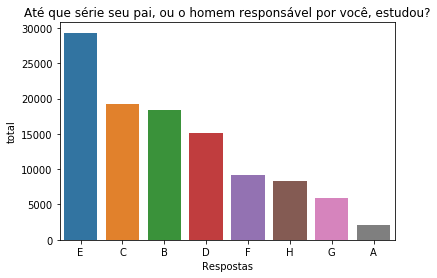

In [20]:
contagem_de_questionario = dadosEnem['Q001'].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem['Q001'].value_counts(normalize=True)

#contagem_de_questionario.head()
plt.title('Até que série seu pai, ou o homem responsável por você, estudou?')


sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


print(" A Nunca estudou. \n B Não completou a 4ª série/5º ano do Ensino Fundamental. \n C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental. \n D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio. \n E Completou o Ensino Médio, mas não completou a Faculdade. \n F Completou a Faculdade, mas não completou a Pós-graduação. \n G Completou a Pós-graduação. \n H Não sei.")






A Nunca estudou. 
 B Não completou a 4ª série/5º ano do Ensino Fundamental. 
 C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental. 
 D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio. 
 E Completou o Ensino Médio, mas não completou a Faculdade. 
 F Completou a Faculdade, mas não completou a Pós-graduação. 
 G Completou a Pós-graduação. 
 H Não sei.


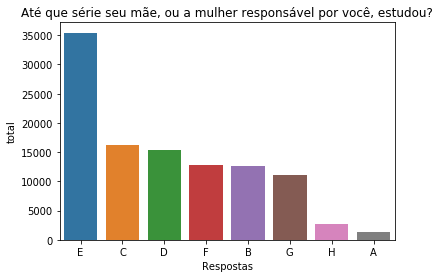

In [21]:
var = 'Q002'
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Até que série seu mãe, ou a mulher responsável por você, estudou?')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


print("A Nunca estudou. \n B Não completou a 4ª série/5º ano do Ensino Fundamental. \n C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental. \n D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio. \n E Completou o Ensino Médio, mas não completou a Faculdade. \n F Completou a Faculdade, mas não completou a Pós-graduação. \n G Completou a Pós-graduação. \n H Não sei.")


#array = pd.DataFrame(dadosEnem[var].value_counts(normalize=True))
#array


 A) Grupo 1: Lavrador, agricultor sem empregados, boia-fria, criador de animais, apicultor, pescador, lenhador, seringueiro, extrativista.  
 B) Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria. 
 C) Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista. 
 D) Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, 

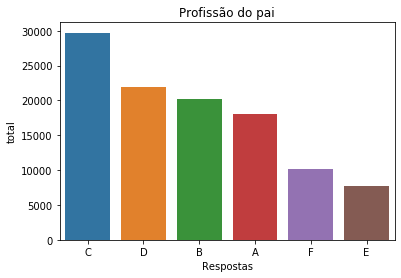

In [22]:
var = 'Q003'
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Profissão do pai')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


print(" A) Grupo 1: Lavrador, agricultor sem empregados, boia-fria, criador de animais, apicultor, pescador, lenhador, seringueiro, extrativista.  \n B) Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria. \n C) Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista. \n D) Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria. \n E)Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados. \n F) Não sei.")


#array = pd.DataFrame(dadosEnem[var].value_counts(normalize=True))
#array


 A) Grupo 1: Lavrador, agricultor sem empregados, boia-fria, criador de animais, apicultor, pescador, lenhador, seringueiro, extrativista.  
 B) Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria. 
 C) Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista. 
 D) Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, 

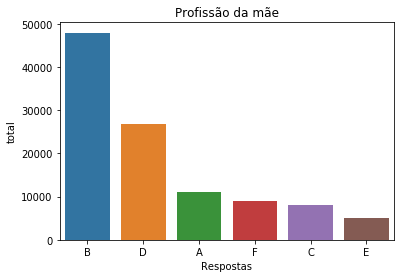

In [23]:
var = 'Q004'
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Profissão da mãe')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)


print(" A) Grupo 1: Lavrador, agricultor sem empregados, boia-fria, criador de animais, apicultor, pescador, lenhador, seringueiro, extrativista.  \n B) Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria. \n C) Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista. \n D) Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria. \n E)Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados. \n F) Não sei.")


#array = pd.DataFrame(dadosEnem[var].value_counts(normalize=True))
#array


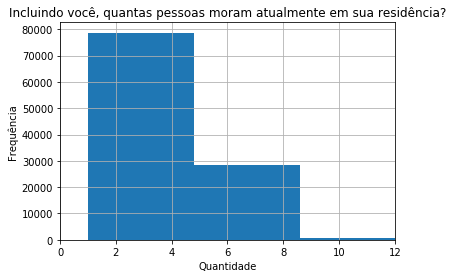

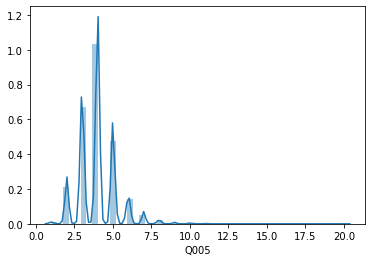

In [24]:
var = 'Q005'
df = dadosEnem[var]
hist = df.hist(bins=5)
hist.set_xlim((0,12))
plt.title('Incluindo você, quantas pessoas moram atualmente em sua residência?')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
hist
plt.show()

sns.distplot(df)



 A:Nenhuma renda. 
 B:Até R$ 937,00. 
 C:De R$ 937,01 até R$ 1.405,50. 
 D:De R$ 1.405,51 até R$ 1.874,00. 
 E:De R$ 1.874,01 até R$ 2.342,50. 
 F:De R$ 2.342,51 até R$ 2.811,00. 
 G:De R$ 2.811,01 até R$ 3.748,00. 
 H:De R$ 3.748,01 até R$ 4.685,00. 
 I:De R$ 4.685,01 até R$ 5.622,00. 
 J:De R$ 5.622,01 até R$ 6.559,00. 
 K:De R$ 6.559,01 até R$ 7.496,00. 
 L:De R$ 7.496,01 até R$ 8.433,00. 
 M:De R$ 8.433,01 até R$ 9.370,00. 
 N:De R$ 9.370,01 até R$ 11.244,00. 
 O:De R$ 11.244,01 até R$ 14.055,00. 
 P:De R$ 14.055,01 até R$ 18.740,00. 
 Q:Mais de R$ 18.740,00. 



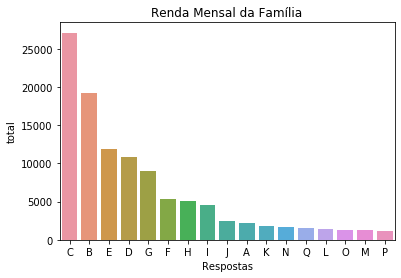

In [25]:
var = "Q006"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas", "total"]
frequencia = dadosEnem[var].value_counts(normalize=True)

plt.title('Renda Mensal da Família')

sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario)

print(" A:Nenhuma renda. \n B:Até R$ 937,00. \n C:De R$ 937,01 até R$ 1.405,50. \n D:De R$ 1.405,51 até R$ 1.874,00. \n E:De R$ 1.874,01 até R$ 2.342,50. \n F:De R$ 2.342,51 até R$ 2.811,00. \n G:De R$ 2.811,01 até R$ 3.748,00. \n H:De R$ 3.748,01 até R$ 4.685,00. \n I:De R$ 4.685,01 até R$ 5.622,00. \n J:De R$ 5.622,01 até R$ 6.559,00. \n K:De R$ 6.559,01 até R$ 7.496,00. \n L:De R$ 7.496,01 até R$ 8.433,00. \n M:De R$ 8.433,01 até R$ 9.370,00. \n N:De R$ 9.370,01 até R$ 11.244,00. \n O:De R$ 11.244,01 até R$ 14.055,00. \n P:De R$ 14.055,01 até R$ 18.740,00. \n Q:Mais de R$ 18.740,00. \n" ) 



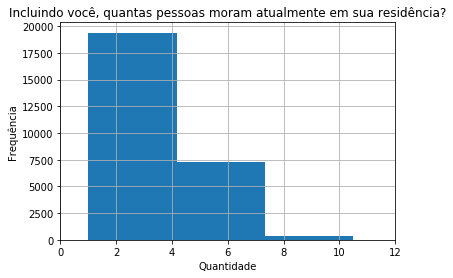

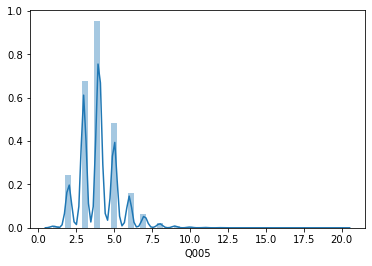

In [26]:
dados_C = dadosEnem.query("Q006 == 'C'")
var = 'Q005'
df = dados_C[var]
hist = df.hist(bins=6)
hist.set_xlim((0,12))
plt.title('Incluindo você, quantas pessoas moram atualmente em sua residência?')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
hist
plt.show()

sns.distplot(df)



# O que foi feito?



1.   Análise das bases de dados públicas e ficou decidido que inicialmente iriamos focar nos dados do Enem de Minas Gerais.
2.   Análise exploratória dos dados do Enem 2017 ( Microdados_Enem_Aluno e Microdados_Enem_Escola)
3.   Busca sobre trabalhos relacionados a clusterização e trabalhos sobre mineração de dados do enem
4.  Surgiu a intenção de relacionar os alunos com a proximidade à Instituições de Ensino Superior Públicas (IESP) e enriquecer a base com dados das cidades de MG.
5. Para saber quais cidades possuiam um IESP o Stênio forneceu uma base. Entretanto, essa base não incluia todos os Campi das IESP, acredito eu só tinha as sedes das instituições. Para conseguir quais cidades possuiam um Campus de uma IESP fui na base do Enade.
6. Para saber mais informações da cidades tenho duas bases:
 uma mais simples que tem a estimativa da população e alguns dados
    1. Estimativas de população enviadas ao TCU (DTB_MG_POP)
    1. PIB dos Munícipios (DTB_MG_PIB) 


    #Datasets

|          Nome          | Fonte |  Ano |                        Observações                        | Linhas | Colunas |
|:----------------------:|:-----:|:----:|:---------------------------------------------------------:|:------:|:-------:|
|  Microdados_Enem_Aluno |  Inep | 2017 |        Algumas Colunas Foram retiradas da Original        | 177552 |    67   |
| Microdados_Enem_Escola |  Inep | 2017 |        Algumas Colunas Foram retiradas da Original        |  1185  |    27   |
|       DTB_MG_POP       |  IBGE | 2017 | Adicionada coluna possui_IESP a partir da base Enade 2017 |   854  |    9    |
|       DTB_MG_PIB       |  IBGE | 2017 |      Falta limpar algumas colunas "estranhas" da base     |   854  |    83   |

